In [39]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

In [40]:
def get_csv(filename):
    df = pd.read_csv(filename, delimiter=","); # Get CSV data
    units = df.iloc[0]; # Get units
    df = df.drop([0]); # Remove units row from dataframe
    
    #      [0]    [1]
    return units, df

Stress                         MPa
Shear rate                     1/s
Viscosity                     Pa.s
Step time                        s
Temperature                     °C
Normal stress                  MPa
Axial force                      N
Gap                             µm
Normal stress coefficient    Pa.s²
Time                             s
Torque                        µN.m
Velocity                     rad/s
Name: 0, dtype: object

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

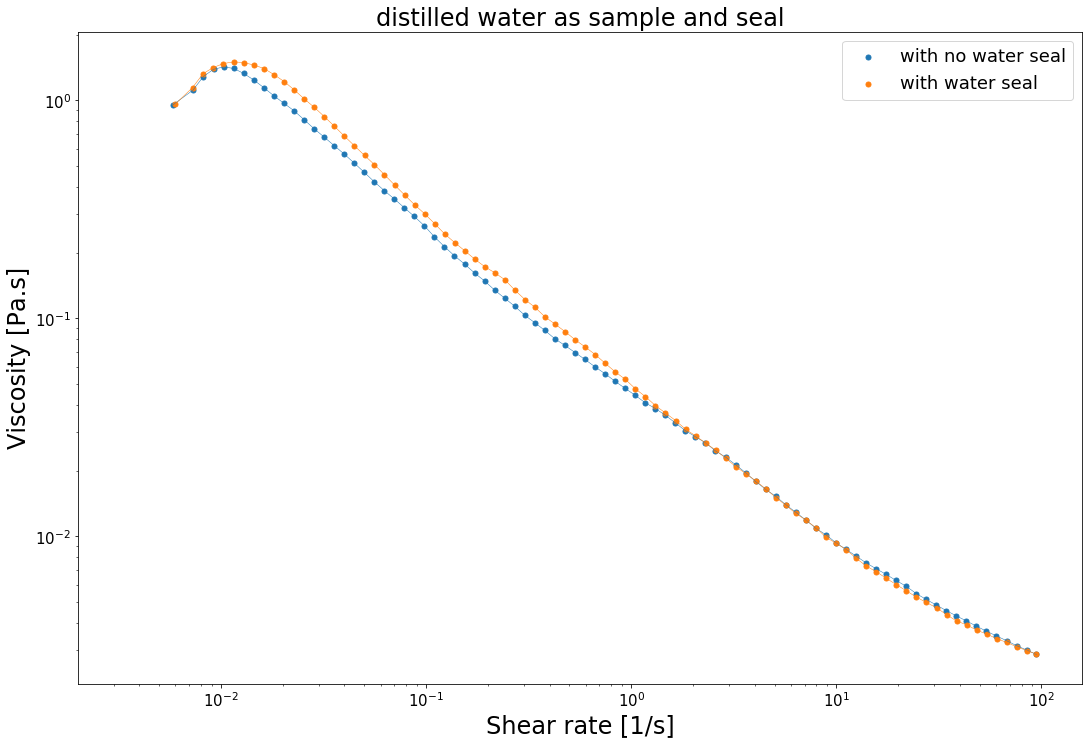

In [144]:
# Get units
units_df = get_csv("./oskt_h2onseal.csv")[0]
display(units_df)

# Get CSV data
nSeal_df = get_csv("./oskt_h2onseal.csv")[1]
wSeal_df = get_csv("./oskt_h2owseal.csv")[1]

# Draw plot canvas
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Chose what to plot
x_index = 1
y_index = 2

# Plot
x = nSeal_df.iloc[:, x_index].to_numpy().astype(np.float)
y = nSeal_df.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=25, label='with no water seal');
plt.plot(x, y, linewidth=0.5);

x = wSeal_df.iloc[:, x_index].to_numpy().astype(np.float)
y = wSeal_df.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=25, label='with water seal');
plt.plot(x, y, linewidth=0.5);

# Display plots
plt.yscale('log');
plt.xscale('log');
plt.xlabel(str(nSeal_df.columns[x_index]) + " [" + str(units_df[x_index]) + "]", fontsize=24);
plt.ylabel(str(nSeal_df.columns[y_index]) + " [" + str(units_df[y_index]) + "]", fontsize=24);
plt.title('distilled water as sample and seal', size=24);
plt.legend(prop={'size': 18});
display(plt);